In [2]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('20100008.csv')
df = df[df["Adjustments"] == "Unadjusted"]

canada_df = df[df["GEO"] == "Canada"]

canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])

canada_df

canada_df_few_cols = canada_df[["North American Industry Classification System (NAICS)", "Time Period", "VALUE"]]
canada_df_pivot = canada_df_few_cols.pivot(index="Time Period", columns="North American Industry Classification System (NAICS)", values="VALUE")

# All stores that do not have data at the start
canada_df_pivot_fewer_cols = canada_df_pivot.drop(columns=["Automobile dealers [4411]",
                            "Automotive parts, accessories and tire stores [4413]", 
                            "Cannabis stores [453993]", "Clothing stores [4481]", 
                            "Clothing stores [4481]", "Convenience stores [44512]", 
                            "Grocery stores [4451]", "Jewellery, luggage and leather goods stores [4483]", 
                            "Other motor vehicle dealers [4412]", "Shoe stores [4482]", 
                            "Specialty food stores [4452]", "Used car dealers [44112]"])

# All classifications that do not have data at the end
canada_df_pivot_fewer_cols = canada_df_pivot_fewer_cols.drop(columns=["Department stores [4521]", "Other general merchandise stores [4529]"])
canada_df_pivot_nona = canada_df_pivot_fewer_cols.dropna()

# calling it normalized because I don't know what else to call it
canada_df_pivot_nona_normalized = pd.DataFrame()
for (columnName, columnData) in canada_df_pivot_nona.iteritems():
    canada_df_pivot_nona_normalized[columnName] = canada_df_pivot_nona[columnName] / canada_df_pivot_nona["Retail trade [44-45]"]

canada_df_old_index = canada_df_pivot_nona_normalized.reset_index()

canada_df_old_index

<ipython-input-2-4e264856d3e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])


,Time Period,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
0,1991-01-01,0.038217,0.027687,0.056795,0.025565,0.313428,0.030178,0.020542,0.117594,0.104538,0.079311,0.009636,0.020004,0.197328,0.165683,1.0,0.027573,0.240820
1,1991-02-01,0.041812,0.028463,0.056419,0.026321,0.305578,0.033718,0.022510,0.106241,0.105359,0.080591,0.011208,0.022765,0.208701,0.173527,1.0,0.025846,0.229215
2,1991-03-01,0.043420,0.031701,0.063819,0.027589,0.300628,0.034046,0.022768,0.093753,0.112365,0.072614,0.011278,0.021781,0.216933,0.181602,1.0,0.024772,0.223390
3,1991-04-01,0.038348,0.035875,0.065407,0.024320,0.267259,0.035316,0.023925,0.089142,0.116889,0.067899,0.011391,0.021890,0.251294,0.205569,1.0,0.024709,0.198346
4,1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2020-05-01,0.047272,0.086789,0.020277,0.020794,0.266756,0.020868,0.013964,0.076791,0.150980,0.079883,0.006903,0.029946,0.231975,0.167420,1.0,0.014941,0.186246
353,2020-06-01,0.042385,0.087650,0.039392,0.020103,0.218455,0.028736,0.019747,0.079252,0.127661,0.074001,0.008988,0.029179,0.274944,0.207127,1.0,0.020628,0.148755
354,2020-07-01,0.046112,0.074559,0.043371,0.021200,0.223780,0.030756,0.020604,0.086526,0.120974,0.073974,0.010153,0.030582,0.274671,0.207712,1.0,0.019607,0.149843
355,2020-08-01,0.043404,0.073449,0.048246,0.023676,0.219567,0.031268,0.020571,0.088527,0.117606,0.072323,0.010698,0.033253,0.271204,0.214407,1.0,0.020880,0.149491


In [13]:
jan_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 1]
feb_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 2]
march_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 3]
apr_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 4]
may_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 5]
june_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 6]
july_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 7]
aug_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 8]
sept_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 9]
oct_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 10]
nov_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 11]
dec_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 12]

month_dfs = [jan_data, feb_data, march_data, apr_data, may_data, june_data, july_data, aug_data, sept_data]

# Make Q1 data ready
new_index_jan_data = jan_data.reset_index()
new_index_feb_data = feb_data.reset_index()
new_index_march_data = march_data.reset_index()

# Make Q2 data ready
new_index_apr_data = apr_data.reset_index()
new_index_may_data = may_data.reset_index()
new_index_june_data = june_data.reset_index()

# Make Q3 data ready
new_index_july_data = july_data.reset_index()
new_index_aug_data = aug_data.reset_index()
new_index_sept_data = sept_data.reset_index()

In [15]:
def get_first_quarter_average(category) :
    Q1_data = (new_index_jan_data[category] + new_index_feb_data[category] + new_index_march_data[category]) / 3
    
    return Q1_data.mean()

def get_second_quarter_average(category) :
    Q2_data = (new_index_apr_data[category] + new_index_may_data[category] + new_index_june_data[category]) / 3
    
    return Q2_data.mean()

def get_third_quarter_average(category) :
    Q3_data = (new_index_july_data[category] + new_index_aug_data[category] + new_index_sept_data[category]) / 3
    
    return Q3_data.mean()

def get_average_of_first_three_quarters(category) :
    return [get_first_quarter_average(category), get_second_quarter_average(category), get_third_quarter_average(category)]

liqour_quarterly_data = get_average_of_first_three_quarters('Beer, wine and liquor stores [4453]')
building_quarterly_data = get_average_of_first_three_quarters('Building material and garden equipment and supplies dealers [444]')
electronics_quarterly_data = get_average_of_first_three_quarters('Electronics and appliance stores [443]')

In [21]:
def get_one_month(data, category, year) :
    current_year_data = data[data["Time Period"].dt.year == year]
    return current_year_data[category].item()

def get_2020_quarterly_data(category):
    Q1 = (get_one_month(new_index_jan_data, category, 2020) + get_one_month(new_index_feb_data, category, 2020) + get_one_month(new_index_march_data, category, 2020)) / 3
    Q2 = (get_one_month(new_index_apr_data, category, 2020) + get_one_month(new_index_may_data, category, 2020) + get_one_month(new_index_june_data, category, 2020)) / 3
    Q3 = (get_one_month(new_index_july_data, category, 2020) + get_one_month(new_index_aug_data, category, 2020) + get_one_month(new_index_sept_data, category, 2020)) / 3
    
    return [Q1, Q2, Q3]

liqour_quarterly_data_2020 = get_2020_quarterly_data('Beer, wine and liquor stores [4453]')
building_quarterly_data_2020 = get_2020_quarterly_data('Building material and garden equipment and supplies dealers [444]')
electronics_quarterly_data_2020 = get_2020_quarterly_data('Electronics and appliance stores [443]')

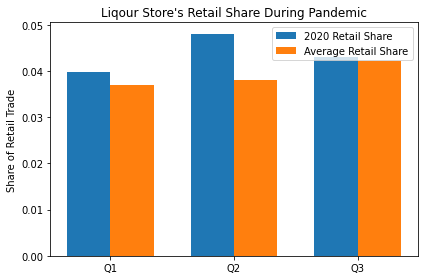

In [22]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Q1', 'Q2', 'Q3']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, liqour_quarterly_data_2020, width, label='2020 Retail Share')
rects2 = ax.bar(x + width/2, liqour_quarterly_data, width, label='Average Retail Share')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of Retail Trade')
ax.set_title("Liqour Store's Retail Share During Pandemic")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

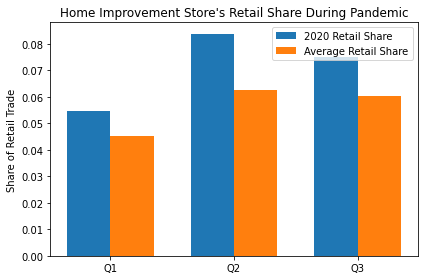

In [37]:
labels = ['Q1', 'Q2', 'Q3']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, building_quarterly_data_2020, width, label='2020 Retail Share')
rects2 = ax.bar(x + width/2, building_quarterly_data, width, label='Average Retail Share')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of Retail Trade')
ax.set_title("Home Improvement Store's Retail Share During Pandemic")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

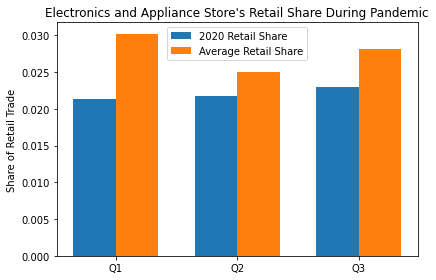

In [38]:
labels = ['Q1', 'Q2', 'Q3']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, electronics_quarterly_data_2020, width, label='2020 Retail Share')
rects2 = ax.bar(x + width/2, electronics_quarterly_data, width, label='Average Retail Share')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of Retail Trade')
ax.set_title("Electronics and Appliance Store's Retail Share During Pandemic")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [25]:
def get_all_of_one_year(month_dfs, category, year):
    monthly_data = []
    for month in month_dfs :
        monthly_data.append(get_one_month(month, category, year))
        
    return monthly_data

canada_df_fullvals_old_index = canada_df_pivot_nona.reset_index()

canada_df_fullvals_old_index

North American Industry Classification System (NAICS),Time Period,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
0,1991-01-01,481113.0,348553.0,714982.0,321830.0,3945700.0,379906.0,258598.0,1480378.0,1316016.0,998432.0,121308.0,251823.0,2484133.0,2085763.0,12588862.0,347110.0,3031651.0
1,1991-02-01,508191.0,345950.0,685731.0,319908.0,3714090.0,409825.0,273596.0,1291283.0,1280562.0,979526.0,136229.0,276688.0,2536615.0,2109098.0,12154321.0,314143.0,2785956.0
2,1991-03-01,622511.0,454501.0,914979.0,395545.0,4310123.0,488117.0,326424.0,1344143.0,1610981.0,1041070.0,161693.0,312273.0,3110183.0,2603642.0,14337072.0,355157.0,3202762.0
3,1991-04-01,579380.0,542013.0,988205.0,367436.0,4037907.0,533579.0,361476.0,1346809.0,1766033.0,1025859.0,172103.0,330720.0,3796699.0,3105848.0,15108570.0,373311.0,2996723.0
4,1991-05-01,732711.0,829549.0,1110745.0,365013.0,4684556.0,560348.0,374439.0,1505592.0,2063682.0,1114109.0,185909.0,403812.0,4176274.0,3411798.0,17225734.0,412054.0,3414088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2020-05-01,2237936.0,4108803.0,959953.0,984435.0,12628827.0,987922.0,661103.0,3635432.0,7147713.0,3781828.0,326820.0,1417724.0,10982201.0,7926049.0,47342177.0,707340.0,8817281.0
353,2020-06-01,2388082.0,4938366.0,2219415.0,1132633.0,12308206.0,1619025.0,1112609.0,4465242.0,7192685.0,4169353.0,506417.0,1644020.0,15490928.0,11669966.0,56342104.0,1162230.0,8381156.0
354,2020-07-01,2640126.0,4268811.0,2483202.0,1213798.0,12812409.0,1760939.0,1179648.0,4953992.0,6926285.0,4235363.0,581292.0,1750963.0,15726106.0,11892437.0,57254433.0,1122564.0,8579186.0
355,2020-08-01,2392769.0,4049075.0,2659708.0,1305212.0,12104254.0,1723762.0,1134010.0,4880323.0,6483395.0,3987018.0,589752.0,1833141.0,14950900.0,11819829.0,55127885.0,1151096.0,8241129.0


In [26]:
jan_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 1]
feb_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 2]
march_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 3]
apr_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 4]
may_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 5]
june_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 6]
july_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 7]
aug_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 8]
sept_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 9]
oct_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 10]
nov_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 11]
dec_data_fullvals = canada_df_fullvals_old_index[canada_df_fullvals_old_index["Time Period"].dt.month == 12]

month_dfs_fullvals = [jan_data_fullvals, feb_data_fullvals, march_data_fullvals, apr_data_fullvals, may_data_fullvals, june_data_fullvals, july_data_fullvals, aug_data_fullvals, sept_data_fullvals]

In [27]:
liquor_data_2020_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Beer, wine and liquor stores [4453]', 2020)
liquor_data_2019_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Beer, wine and liquor stores [4453]', 2019)
liquor_data_2018_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Beer, wine and liquor stores [4453]', 2018)

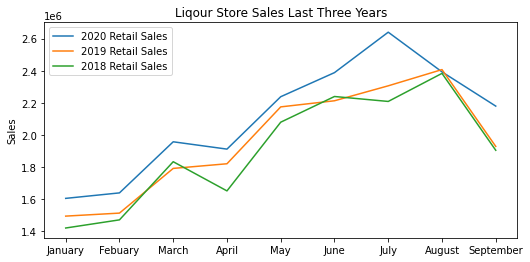

In [29]:
labels = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(7.5, 3.75))
rects1 = ax.plot(labels, liquor_data_2020_full_vals, label='2020 Retail Sales')
rects2 = ax.plot(labels, liquor_data_2019_full_vals, label='2019 Retail Sales')
rects3 = ax.plot(labels, liquor_data_2018_full_vals, label='2018 Retail Sales')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title("Liqour Store Sales Last Three Years")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

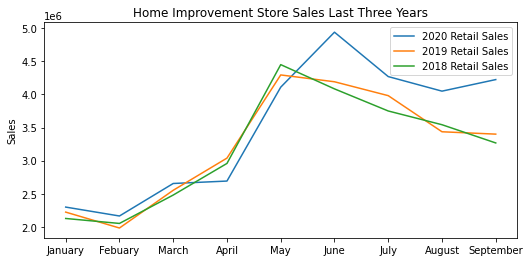

In [35]:
building_data_2020_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Building material and garden equipment and supplies dealers [444]', 2020)
building_data_2019_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Building material and garden equipment and supplies dealers [444]', 2019)
building_data_2018_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Building material and garden equipment and supplies dealers [444]', 2018)

labels = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September']


fig, ax = plt.subplots(figsize=(7.5, 3.75))
rects1 = ax.plot(labels, building_data_2020_full_vals, label='2020 Retail Sales')
rects2 = ax.plot(labels, building_data_2019_full_vals, label='2019 Retail Sales')
rects3 = ax.plot(labels, building_data_2018_full_vals, label='2018 Retail Sales')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title("Home Improvement Store Sales Last Three Years")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

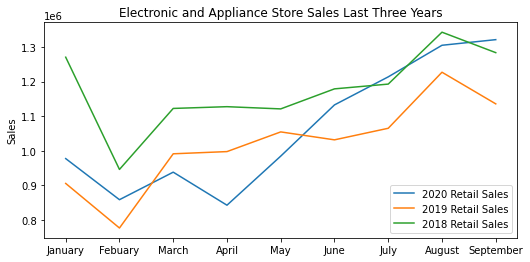

In [36]:
electronics_data_2020_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Electronics and appliance stores [443]', 2020)
electronics_data_2019_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Electronics and appliance stores [443]', 2019)
electronics_data_2018_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Electronics and appliance stores [443]', 2018)

labels = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

fig, ax = plt.subplots(figsize=(7.5, 3.75))
rects1 = ax.plot(labels, electronics_data_2020_full_vals, label='2020 Retail Sales')
rects2 = ax.plot(labels, electronics_data_2019_full_vals, label='2019 Retail Sales')
rects3 = ax.plot(labels, electronics_data_2018_full_vals, label='2018 Retail Sales')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title("Electronic and Appliance Store Sales Last Three Years")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

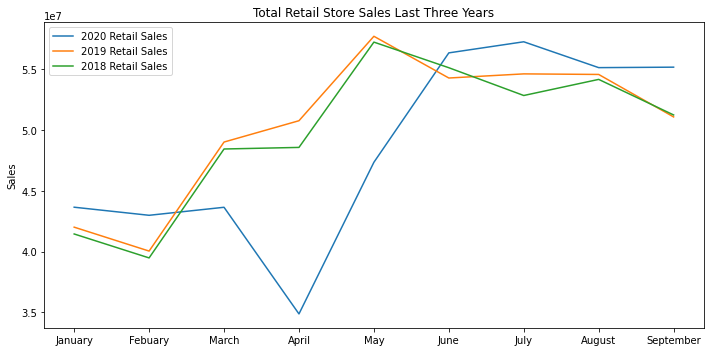

In [34]:
totalretail_data_2020_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Retail trade [44-45]', 2020)
totalretail_data_2019_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Retail trade [44-45]', 2019)
totalretail_data_2018_full_vals = get_all_of_one_year(month_dfs_fullvals, 'Retail trade [44-45]', 2018)

labels = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.plot(labels, totalretail_data_2020_full_vals, label='2020 Retail Sales')
rects2 = ax.plot(labels, totalretail_data_2019_full_vals, label='2019 Retail Sales')
rects3 = ax.plot(labels, totalretail_data_2018_full_vals, label='2018 Retail Sales')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title("Total Retail Store Sales Last Three Years")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()